In [1]:
# various imports

import numpy as np
import matplotlib.pyplot as plt
from numpy import tanh
from IPython.display import clear_output
from sklearn import preprocessing
from sklearn.utils import shuffle

from MLP import *
from utils import proximal_bundle_method

# i define a dataset to test my nets on 1-dimensional regression task. the dataset is composed of a number of patterns 
# ( x, f_target(x)+some_noise ),
# generated as follows:

# definition of the function to do regression on
f_target = lambda x: x**3 - x**2

#generate data
tx = np.sort( ( 2*np.random.rand(300)-1 )*2 ) # random sorted input
ty = np.array( [ f_target(x) + (2*np.random.rand()-1) for x in tx ] ) # desired output, plus some noise

# rescale input
tx = (tx-np.min(tx))/(np.max(tx)-np.min(tx))

# give data the proper shape
tx = tx.reshape(-1,1)
ty = ty.reshape(-1,1)
data = np.hstack((tx,ty))

In [18]:
errors_m = []
iterations_m = []
times_m = []

errors_b = []
iterations_b = []
times_b = []

for _ in range(10):
  n = MLP(  Nh=[10], Nu=1, Ny=1, f='tanh', f_out='ide', w_scale=2, w_range=.7)
  init_w = np.copy(n.w)
  # train the net with momentum training
  g_m,e_m,t_m,ep_m = n.momentum_train(tx, ty,alpha=5e-02,beta=0.5,epsilon=1e-5,tresh=.02,max_epochs=2000)
  errors_m.append(e_m[-1])
  iterations_m.append(ep_m)
  times_m.append(t_m[-1])

  n.w = init_w

  # train the network with bundle method
  g_b, e_b, t_b, ep_b = proximal_bundle_method(n, tx, ty, mu=10, reg_param=1e-12)
  errors_b.append(e_b[-1])
  iterations_b.append(ep_b)
  times_b.append(t_b[-1])

optimal
1.3551923998736997


In [19]:
print(errors_m )
print(iterations_m )
print(times_m)

print(errors_b) 
print(iterations_b) 
print(times_b) 

print(' MOMENTUM ')
best_m = min(errors_m)
print('best',best_m)
print('mean',np.mean(errors_m))
print('median',np.median(errors_m))
print('variance',np.var(errors_m))

print()
print(' BUNDLE ')
best_b = min(errors_b)
print('best',best_b)
print('mean',np.mean(errors_b))
print('median',np.median(errors_b))
print('variance',np.var(errors_b))

print()
best = min([best_m,best_b])
print(best)

[0.4622610292612271, 0.8351855140311666, 0.7701058039101208, 0.7661630137858122, 0.7757880597779978, 0.9361008496666102, 0.6934713884310334, 0.7983495282583939, 0.8260748632483523, 0.6642684290480813]
[1794, 457, 562, 696, 618, 391, 895, 481, 452, 840]
[89.65858090899997, 23.65810519200022, 29.397055935000026, 36.74894735099997, 33.06472768599997, 20.670490854000036, 48.09044777899999, 25.79641682500005, 24.463770882000063, 45.154751699999906]
[0.5042435819136686, 0.40331605624774214, 0.6836008544952261, 0.4278888372955045, 0.6737223989450288, 0.44657892197298593, 0.48431342505586306, 0.4319611871438681, 0.5020826352382106, 4.758191960084937]
[54, 45, 101, 51, 101, 44, 53, 52, 101, 101]
[8.559259085999884, 6.947550253999907, 19.915269278000096, 8.236864868999874, 20.30135850900001, 6.980243768000037, 8.721562000999938, 8.53757105600016, 20.1929516350001, 19.74443753200012]
 MOMENTUM 
best 0.4622610292612271
mean 0.7527768479418795
median 0.7729469318440594
variance 0.014460766276176346

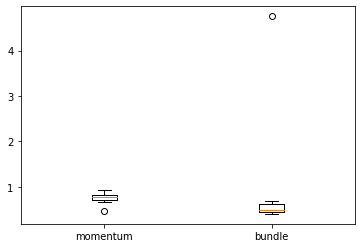

In [23]:
_ = plt.boxplot((errors_m,errors_b), labels=['momentum','bundle'])

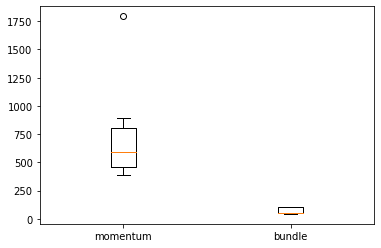

In [24]:
_ = plt.boxplot((iterations_m,iterations_b), labels=['momentum','bundle'])

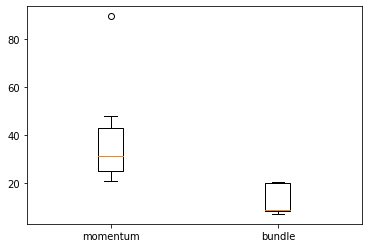

In [25]:
_ = plt.boxplot((times_m,times_b), labels=['momentum','bundle'])

In [26]:
n = MLP(  Nh=[10], Nu=1, Ny=1, f='tanh', f_out='ide', w_scale=2, w_range=.7)

# now i train my net. In this case i use classical momentum with no regularization. after training i plot some convergence-curves 
# using data i collected during training

init_w = np.copy(n.w)

# train the net with momentum training
g_m,e_m,t_m,ep_m = n.momentum_train(tx, ty,alpha=1e-02,beta=0.5,epsilon=1e-5,tresh=.01,max_epochs=2000)

n.w = init_w

# train the network with bundle method
from utils import proximal_bundle_method
g_b, e_b, t_b, ep_b = proximal_bundle_method(n, tx, ty, mu=10, reg_param=1e-12)

optimal
0.011701675660777256


In [27]:
def correct(es,b):
  for i in range(len(es)):
    es[i] = abs(es[i] - b )/b

correct(e_m, best)
correct(e_b, best)
print(e_b)
print(e_m)

[26.41680322726537, 24.421825311622747, 22.493199492412224, 21.461832269902324, 19.388169098272748, 16.352461832575543, 12.397736862879817, 8.75910531622881, 8.75910531622881, 8.75910531622881, 8.417470377992853, 7.074038181985539, 7.074038181985539, 5.693016422298029, 5.03859105862048, 4.5482461913158785, 3.5957953852285853, 3.482164295907118, 1.936874622582138, 1.5959958684508881, 1.3706673687430444, 1.3706673687430444, 1.011828870269712, 1.011828870269712, 1.011828870269712, 0.897460898262063, 0.8402868832145277, 0.7962762440771962, 0.7622817960273163, 0.7469022270815823, 0.7469022270815823, 0.7469022270815823, 0.7469022270815823, 0.7469022270815823, 0.7469022270815823, 0.7469022270815823, 0.7489367703576889, 0.7489367703576889, 0.7489367703576889, 0.7489367703576889, 0.7489367703576889, 0.7507675336722935, 0.7507675336722935, 0.7507675336722935, 0.7527342895060194, 0.7527342895060194, 0.7527342895060194, 0.7527342895060194, 0.7542226313004089, 0.7542226313004089, 0.7542226313004089

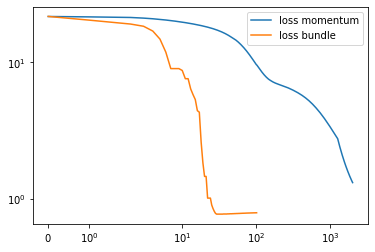

In [28]:
# plot the results with iterations
plt.plot( e_m,label='loss momentum')
plt.plot( e_b,label='loss bundle')
plt.yscale('symlog')
plt.xscale('symlog')
plt.legend()

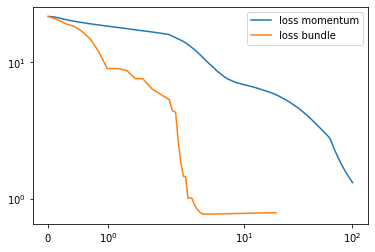

In [29]:
# plot the results with time
plt.plot(t_m, e_m,label='loss momentum')
plt.plot(t_b, e_b,label='loss bundle')
plt.yscale('symlog')
plt.xscale('symlog')
plt.legend()

In [17]:
e_b[-1]

0.06631276784326558